Assignment_Predictive Modelling

Oksana Goljevacki


BACKGROUND: 
The data for modeling contains information on Selling price of each house in million Rs. It also contains Carpet area in square feet, Distance from nearest metro station and Number of schools within 2 km distance. The data has 198 rows and 5 columns.

# 1.Import House Price Data. Check the structure of the data.

In [108]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
house_data = pd.read_csv(r'C:\Users\duoxa\Desktop\FPM_assignments\House Price Data.csv')
print(house_data.describe())

          Houseid       Price         Area    Distance     Schools
count  198.000000  198.000000   198.000000  198.000000  198.000000
mean    99.500000   25.390455  1040.393939    2.335152    2.494949
std     57.301832    4.854549    98.348786    0.991971    0.540234
min      1.000000   16.300000   825.000000    0.100000    1.000000
25%     50.250000   21.532500   967.000000    1.930000    2.000000
50%     99.500000   25.305000  1033.000000    2.260000    3.000000
75%    148.750000   28.670000  1094.000000    3.040000    3.000000
max    198.000000   35.490000  1345.000000    4.330000    3.000000


In [32]:
house_data.head(5)

,Houseid,Price,Area,Distance,Schools
0,1,24.74,1036,3.22,2
1,2,20.15,1030,4.33,3
2,3,25.98,1046,1.94,3
3,4,20.10,950,2.45,2
4,5,23.03,952,2.47,2


<Axes: >

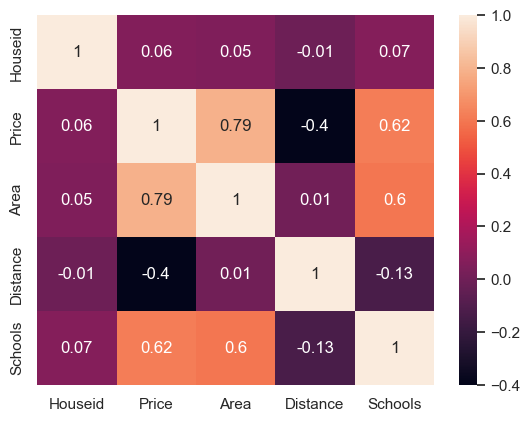

In [110]:
import seaborn as sns 
correlation_matrix = house_data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# 2.Split the data into Training (80%) and Testing (20%) data sets

In [112]:
# Drop the 'Houseid' column due to 
house_data = house_data.drop(['Houseid'], axis=1)

# Verify the changes
print(house_data.head())

   Price  Area  Distance  Schools
0  24.74  1036      3.22        2
1  20.15  1030      4.33        3
2  25.98  1046      1.94        3
3  20.10   950      2.45        2
4  23.03   952      2.47        2


In [114]:
from sklearn.model_selection import train_test_split
house_data_train, house_data_test = train_test_split(house_data, test_size=0.2, random_state=42)

In [91]:
print(house_data_train)

     Price  Area  Distance  Schools
137  21.33   967      3.64        2
5    21.02   967      3.64        2
66   23.71  1036      3.22        2
138  17.14   825      1.49        2
104  21.52   967      3.64        2
..     ...   ...       ...      ...
106  32.44  1162      2.26        3
14   30.86  1094      2.24        3
92   22.72  1139      4.21        3
179  30.27  1094      2.24        3
102  20.85   950      2.45        2

[158 rows x 4 columns]


In [116]:
print(house_data_test.head())

     Price  Area  Distance  Schools
65   33.20  1345      2.07        3
114  31.17  1044      2.01        3
16   26.75  1028      2.23        1
141  26.19  1084      1.47        2
156  23.31   997      3.04        2


# 3.Build a regression model on training data to estimate selling price of a House.

In [118]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separate features (X) and target (Y) in the training data
x_train = house_data_train.drop(['Price'], axis=1)  
y_train = house_data_train['Price']
# Instantiate and train the regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
x_test = house_data_test.drop(['Price'], axis=1)
y_test = house_data_test['Price']

predictions = model.predict(x_test)
print(predictions)


[37.02872456 26.81004938 22.97288749 27.75682707 21.82912636 28.02129048
 27.7150383  24.1841162  26.39767858 27.00985031 25.94865486 26.81004938
 21.18114704 29.31128112 22.97288749 25.60230458 29.72066752 27.75682707
 26.81004938 23.96874202 28.09523758 25.6022918  28.02129048 21.18114704
 30.39169946 27.00985031 18.0181552  23.87954191 26.39767858 18.84289601
 21.32142133 18.84289601 25.94865486 25.84868432 21.82912636 25.94865486
 24.1841162  18.82980762 23.96874202 26.39767858]


# 4. List down significant variables and interpret their regression coefficients.

In [120]:
model.coef_

array([ 0.03432257, -1.87365406,  1.43789842])

Coefficient for the First Feature,Area (0.03432257)
This indicates a positive relationship between the Area and the Price
Coefficient for the Second Feature,Distance (-1.87365406)
This suggests a negative relationship between the second feature and the selling price,Distance increases, the Price tends to decline.
Coefficient for the Third Feature,Schools (1.43789842)
This indicates a positive relationship between the number of Schools  and Price

#OLS Regression method 

In [206]:
x = house_data_train.drop(columns=['Price', ])
y = house_data_train['Price'] 
x = sm.add_constant(x)
model=sm.OLS(y,x).fit()
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           6.08e-55
Time:                        16:22:42   Log-Likelihood:                -348.18
No. Observations:                 158   AIC:                             704.4
Df Residuals:                     154   BIC:                             716.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5704      1.935     -4.947      0.0

Area:
P-value: 0.000, very high level of significance 
Distance:
P-value: 0.000, the coefficient for distance is also statistically significant 
Schools:
P-value: 0.002, the coefficient for the number of schools is statistically significant

# 5.What is the R2 and adjusted R2 of the model? Give interpretation.

R-squared:  0.808 means that approximately 80.8% of the variance in selling proce can be explained by independent variables : Area,Dustance,Schools.
This suggest a strong relationships between predictors and target variable(Price) . It indicates that model is quite effective .

Adj. R-squared: 0.804 means that considering number of predictors approximately 80.4% of the variance in house prices is explained by the model.


Both R² and adjusted R² values are quite high, indicating that the model fits the data well and effectively explains the variability in house prices.

# 6.Is there a multicollinearity problem? If yes, do the necessary steps to remove it.

In [208]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, x = dmatrices('Price~Area+Distance+Schools', data=house_data_train, return_type="dataframe")

vif = pd.Series([variance_inflation_factor(x.values, i)for i in range(x.shape[1])],index=x.columns)
vif
  

Intercept    119.989405
Area           1.698577
Distance       1.055206
Schools        1.764126
dtype: float64

VIF < 5: Does not indicate multicollinearity 

# 7.Are there any influential observations in the data? 

In [210]:
influence = model.get_influence()


In [212]:
print(influence_data)

     Leverage  Cooks_Distance
0    0.020695        0.002997
1    0.020695        0.001979
2    0.018069        0.000735
3    0.041452        0.006534
4    0.020695        0.003725
..        ...             ...
153  0.016081        0.003535
154  0.012044        0.004784
155  0.039410        0.022582
156  0.012044        0.002960
157  0.013126        0.000152

[158 rows x 2 columns]


In [214]:
# Calculate Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

In [216]:
influence.summary_frame()

,dfb_const,dfb_Area,dfb_Distance,dfb_Schools,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
137,0.025783,-0.017804,0.069312,-0.022381,0.002997,0.753168,0.020695,0.109489,0.752105,0.109334
5,0.020939,-0.014459,0.056291,-0.018177,0.001979,0.612069,0.020695,0.088977,0.610822,0.088796
66,-0.008092,0.021084,0.019673,-0.033411,0.000735,0.399798,0.018069,0.054233,0.398705,0.054085
138,-0.152179,0.119110,0.049814,-0.020784,0.006534,-0.777410,0.041452,-0.161665,-0.776407,-0.161456
104,0.028756,-0.019857,0.077305,-0.024962,0.003725,0.839648,0.020695,0.122061,0.838839,0.121943
...,...,...,...,...,...,...,...,...,...,...
106,-0.076865,0.059687,0.001732,0.015930,0.003535,0.930109,0.016081,0.118908,0.929700,0.118856
14,-0.027814,-0.008628,0.011159,0.078229,0.004784,1.252879,0.012044,0.138334,1.255218,0.138593
92,0.139957,-0.031653,-0.244255,-0.102843,0.022582,-1.483791,0.039410,-0.300544,-1.489652,-0.301731
179,-0.021836,-0.006774,0.008760,0.061414,0.002960,0.985515,0.012044,0.108814,0.985422,0.108804


In [391]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

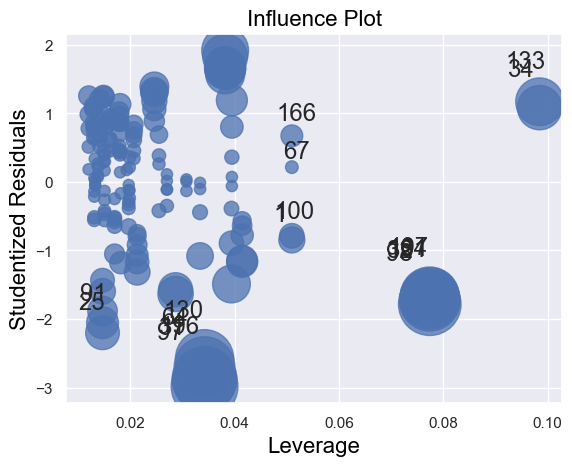

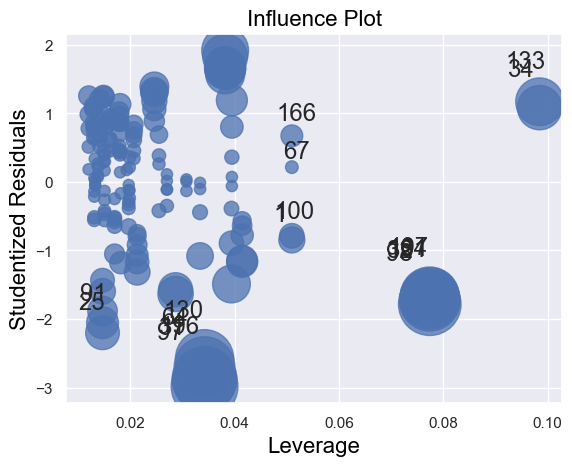

In [393]:
influence_plot(model, criterion='cooks')

In [ ]:
#interpretation: The data points displayed on the plot are influential observations and could affect regression results.
#25,130,100,67,166,34,133....

# 8.Can we assume that errors follow ‘Normal’ distribution?

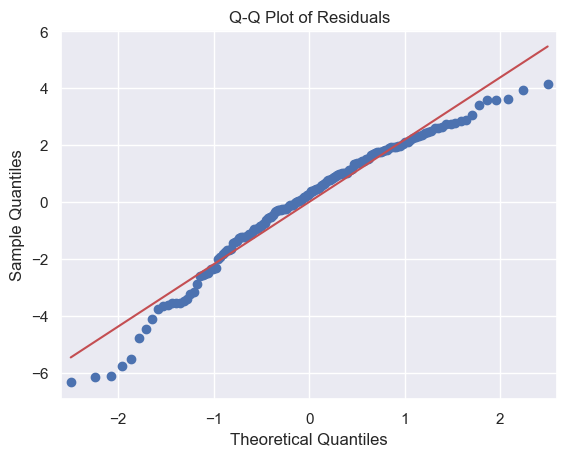

In [274]:
residuals = model.resid  
sm.qqplot(residuals, line='s')  
plt.title("Q-Q Plot of Residuals")  
plt.show()
# Points deviate from the diagonal line.It indicates that the residuals do not follow a normal distribution.

In [228]:
  from scipy import stats

shapiro_test = stats.shapiro(residuals)
print(shapiro_test) 

ShapiroResult(statistic=0.9604994662408668, pvalue=0.00017952064385491973)


#P-value is less than a chosen significance level 0.05, we reject the null hypothesis, indicating that the residuals are not normally distributed.

# 9.Is there a Heteroscedasticity problem? Check using residual vs. predictor plots.

In [380]:
import pandas as pd
# Assuming model is already fitted
house_data_train['pred'] = model.fittedvalues
house_data_train['res'] = model.resid

<Axes: xlabel='pred', ylabel='res'>

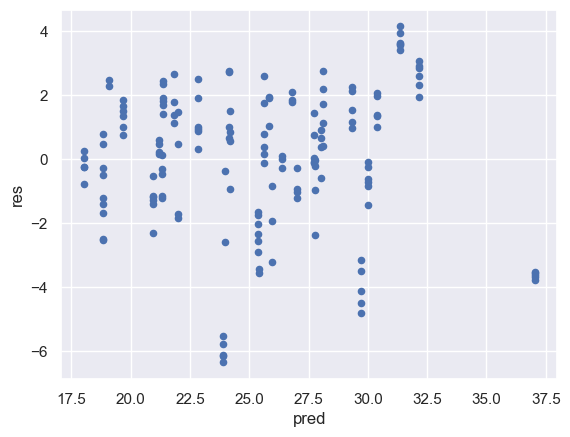

In [256]:
house_data_train.plot.scatter(x='pred',y='res')
#variance of the residuals is not constant.It indicates Heteroscedasticity problem.

# 10.Calculate the RMSE for the Training and Testing data. Multiple Linear Regression.


In [382]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [384]:
import numpy as np
house_data_train = house_data_train.assign(res=pd.Series(model.resid))
print(house_data_train.head())
# Calculate RMSE for the training dataset
RMSEtrain = np.sqrt((house_data_train['res']**2).mean())
print(RMSEtrain)

     Price  Area  Distance  Schools       pred       res
137  21.33   967      3.64        2  19.675257  1.654743
5    21.02   967      3.64        2  19.675257  1.344743
66   23.71  1036      3.22        2  22.830449  0.879551
138  17.14   825      1.49        2  18.829808 -1.689808
104  21.52   967      3.64        2  19.675257  1.844743
2.191854721962791


In [ ]:
#RMSE=2.191854721962791

In [386]:
# Prepare test data
X_test = sm.add_constant(X.loc[house_data_test.index])  # Add constant to test features

predictions = model.predict(X_test)

house_data_test = house_data_test.assign(pred=predictions)

# Calculate residuals
house_data_test = house_data_test.assign(res=house_data_test['Price'] - house_data_test['pred'])

# Calculate RMSE for the test dataset
RMSEtest = np.sqrt((house_data_test['res']**2).mean())

print(f'RMSE for test {RMSEtest}')

RMSE for test 2.230847049584755


In [375]:
#RMSE for test 2.230847049584755

RMSE for test data is slightly higher ,that indicates that model perform slightly better on train data set. 
However,difference is not substantial suggesting that the model works reasonably well .

In [388]:
mean_price = house_data['Price'].mean()
print(f'Mean Price: {mean_price}')

Mean Price: 25.390454545454542


#RMSE is under 10% of average Price value what could suggest that model's predictions are relatively close to real values .